## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix, references, and information about GitHub and individual contribution will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

University ranking matters to students. When applying to college, students often decide where to apply based on ranking. As students at a high-ranked university, we can attest to this. But, what exactly is ranking based on? We want to understand the mechanisms behind university ranking and what factors contribute to these rankings based on regression analysis. We would like to know why our school has its current ranking and identify areas where higher-ranked schools are performing better. 

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. Interpret the problem as inference and/or prediction.

Our project aims to predict the ranking of universities based on various factors. This is a classification problem as our objective is to classify universities into different categories: high, medium-high, medium-low, and low. Our goal is to provide stakeholders with information on which factors, such as expenditure per student, admit rate, and median SAT/ACT score, affect institutional rankings and which variables are most influential in the rankings. Thus, this is a prediction and inference problem. We are to predicting the response (ranking) directly and seeking to understand the relationship between the response and predictor variables (institutional attributes).

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

Data set 1:
We obtained the rankings of 311 universities and some relevant variables including average test scores, financial aid, and more from Kaggle (https://www.kaggle.com/datasets/theriley106/university-statistics?resource=download). 

Data set 2:
We obtained various information from College Scorecard data (https://collegescorecard.ed.gov/data/) that includes enrollment, admission rate, tuition, and more. We selected some relevant variable to add on as predictors.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

There are many stakeholders who care about university rankings: including students, parents, university faculty, employers, and the universities themselves. Students are interested in comparing what their university offers to institutions with comparable rankings. They also wish to identify the areas where higher-ranked schools are performing better. Meanwhile, universities want to comprehend how factors such as expenditure, test scores, and other statistical measures of performance impact their rankings. Identifying influential factors can streamline university initiatives to concentrate efforts to enhance their rankings. 

There is a lot of mystery surrounding the current college rankings process, as exhibited by the recent case of Columbia "gaming" its ranking in the US News and World Report [1]. We hope to demystify this process to the greatest extent possible.

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

# Data quality check

#### Data Cleaning and Preparation
During the data cleaning process, we took several steps to ensure the accuracy and reliability of the dataset. Firstly, we removed columns that were deemed extraneous or did not contain useful values. Additionally, 11 institutions that were unranked were dropped from the dataset. We manully selected 54 predictors from the College Scorecard data set and added them for the institutions ranked in Kaggle. To minimize the presence of missing values in relevant variables, we prioritized data from College Scorecard and filled in missing values using the Kaggle dataset for variables that were common between both datasets, such as sat_avg. Furthermore, to avoid multicollinearity and improve the model's predictions, we removed duplicate columns that measured ranking.

## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

<AxesSubplot:xlabel='rankingSortRank', ylabel='Count'>

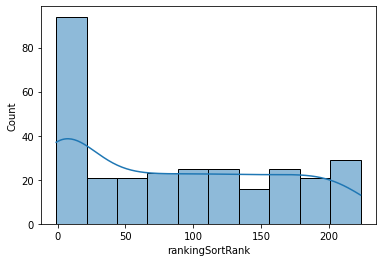

In [2]:
import pandas as pd
import seaborn as sns
dfeda = pd.read_csv('/Users/isabelpodolsky/Desktop/newdata.csv')
sns.histplot(dfeda.rankingSortRank, kde = True)

The main takeaway from the EDA was that the ranking variable contained some nonsense values. The expectation was that the ranking variable would have an even distribution, but instead there's a right skew. This means that we created two datasets: one was filtered to remove the -1 rankings, and the other was not. 

<AxesSubplot:xlabel='tuition', ylabel='rankingSortRank'>

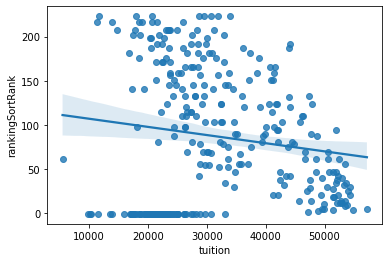

In [3]:
sns.regplot(x = 'tuition', y = 'rankingSortRank', data = dfeda)

<AxesSubplot:xlabel='act_avg', ylabel='rankingSortRank'>

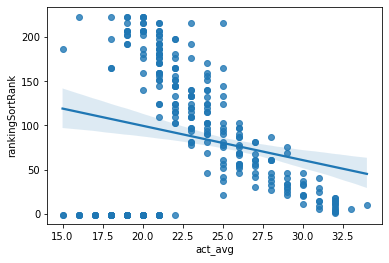

In [4]:
sns.regplot(x = 'act_avg', y = 'rankingSortRank', data = dfeda) 

Excluding the nonsense ranking variables, some variables, such as tuition and act_avg, showed a near-perfect negative linear correlation with the target variable. We know these variables should be in the equation. 

The pairplot is not included here but can be found in the code document -- this pairplot reveals that relationships either seemed to be linear or random. Thus, we did not transform any predictors. However, it did exhibit a lot of multicollinearity between variables. This means variable selection is the best path forward. After we fit the naive model, we will do variable selection. 

## Approach

_What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?_

We used a logistic regression model. We optimized a performance metric that we customized specifically for this problem: if the model predicted the college category correctly, we added 1 to the total "correct count." After evaluating all categories, we divided total "correct count" by the number of observations in the dataset. Essentially, this metric calculated (TPR/FP+TN). Our primary focus was evaluating the number of true positives, because this is the most important determinant of if the model is properly sorting colleges into ranking categories. 

_Is there anything unorthodox / new in your approach?_

To select the best logistic regression model, we used last-one-out cross validation (LOOCV). 

_What problems did you anticipate? What problems did you encounter? Did the very first model you tried work?_

We anticipated there would be problems using LOOCV on a classification model because it was unfamiliar territory. These problems did occur. The very first model we tried did not work. However, we overcame these setbacks to create a working model. 

_Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?_

There were no models publicly available for the dataset we used because we used a novel dataset. We also used an approach that is novel in this space -- logistic regression, validated through LOOCV, for classification. So, we did not have any models to use for comparison. 

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

Many observations have invalid/NA rankings. We use two approaches for this problem: (1) we fill those ranking with mean (2) we drop those observations with invalid rankings. We will first run code on dataset from approach (1) and then approach (2).

we fisrt use dataset(1) to run main model with 1 cutoff, which will classify into category low and high. We will compute accuracy and generate dataset based on this model for submodel (low category become datset predicted_l, high category become datset predicted_h).

We then use dataset(1) to run main model with 3 cutoff, which will classify into category low, medium high, medium high and high. We will compute accuracy and compare the accuracy with submodel.

For submodel, we will use predicted_h to run the model again, getting prediction for medium high and high. We will also use predicted_l to run the model, getting prediction for medium low and low. We then compute accuracy for two submodels.

We will do the same process for dataset (2), figuring out which dataset is more suitable. We then compare accuracy from submodel and main model with 3 cutoff.

We create model with all predictors involved in LOOCV and pick all the significant predictors in the model and express in the equations below.

**Put the final model equation**.

For model 1: rankingSortRank = -42.8449*businessRepScore*admission_rate -6.6828*act_avg + 0.0006*cost_after_aid - 21.5183*hs_gpa_avg - 13.26*businessRepScore + 21.8340*admission_rate - 0.0007*ug_enrollment + 163.4428*percent_parttime - 0.0025*avg_cost + 0.0032*instante_tuition - 0.0023*outstate_tuition - 0.0029*avg_faculty_salary
For model 2: rankingSortRank =
Category 1 – high/med-high: -21.9889*hs_gpa_avg + 96.9959*admission_rate - 0.0016*ug_enrollment + 102.3699*percent_parttime - 0.0008*avg_cost + 0.0008*instante_tuition + 0.0066*outstate_tuition + 3.718e-05*instructional_expenditure_per - 0.0019*avg_faculty_salary
Category 2 – med-low/low: -6.6533*act_avg + 0.0006*cost_after_aid - 26.7091*hs_gpa_avg - 27.8643*businessRepScore + 152.9628*percent_parttime - 0.0032*avg_cost + 0.0038*instante_tuition - 0.0016*outstate_tuition - 0.0010*instructional_expenditure_per - 0.0027*avg_faculty_salary

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

The baseline model using all predictors without any transformation/interaction has an accuracy of 82% if all data is used for train and predict on train, but the model is likely overfitting. Splitting the data into train and test by random sampling results in a classification accuracy of 78%.

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

It's convenient expensive for the stakeholders to collect the data relating to the predictors in the model because many data are available on website of education department. The limitation will be that our model can only based on yearly basis, becuase those dataset do not update on more frequent basis.

When will your model become too obsolete to be useful?

The model will not become too obsolete to be useful for a long time, until college ranking is not significant to our stakeholders.

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

https://github.com/shrayvaidya/datasci303-2

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Peggy Han</td>
    <td>Data cleaning and preparation</td>
    <td>Cleaned data to drop irrelevant variables; prepared final data set by selecting potentially significant predictors to add on and minimizing number of missing values</td>
    <td>9</td>
  </tr>
  <tr>
    <td>Mingyi Gong</td>
    <td>Develop main model with LOOCV</td>
    <td>develop main model that classify 2 categories for generating dataset for submodels; develop main model with 3 cutoff the directly classify into 4 categories, which will compare with submodel </td>
    <td>13</td>
  </tr>
    <tr>
    <td>Izzy Podolsky</td>
    <td></td>
    <td></td>
    <td></td>  
  </tr>
    <tr>
    <td>Shray Vaidya</td>
    <td></td>
    <td></td>
    <td></td>   
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] https://www.statology.org/leave-one-out-cross-validation-in-python/
[2]https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
[3] https://stackoverflow.com/questions/47390313/sklearn-loocv-split-returning-a-smaller-test-and-train-array-than-expected


[4] https://www.kaggle.com/datasets/theriley106/university-statistics?resource=download

[5] https://collegescorecard.ed.gov/data/

## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.